Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Vaidehi Patel"
COLLABORATORS = "Sowmya Vijayasundaram"

# Project Overview

## Contents:

1. EDA/Database Setup and Management
2. Data Cleaning
3. Data Transformation
4. Graphs
5. Model Training
6. Model Evaluation
7. Optimization

## Objective:
Obesity is a critical public health issue with significant physical and mental health implications, including increased risks for heart disease, Type 2 diabetes, and sleep apnea. Our goal is to predict obesity levels from a dataset containing various features such as age, gender, and responses to lifestyle-related questions. 

In [2]:
import importlib
import subprocess

def install_and_import(package):
    try:
        importlib.import_module(package)
    except ImportError:
        subprocess.check_call(["pip", "install", package])
    finally:
        globals()[package] = importlib.import_module(package)

# List of required packages 
required_packages = {
    "pandas": "pd", 
    "numpy": "np", 
    "sqlite3": "sqlite3",
    "sklearn.model_selection": "train_test_split", 
    "sklearn.metrics": "accuracy_score",  
    "statsmodels": "sm", 
    "matplotlib.pyplot": "plt", 
    "seaborn": "sns",
    "kagglehub": "kagglehub"
}

for package, alias in required_packages.items():
    module_name = package.split(".")[0]
    install_and_import(module_name)

import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from scipy.stats import zscore
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [3]:
# Step 1: Load Kaggle Data into DataFrame
# Download the dataset
path = kagglehub.dataset_download("fatemehmehrparvar/obesity-levels")

csv_file_path = f"{path}/ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(csv_file_path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [5]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
data.shape

(2111, 17)

In [7]:
data.duplicated().sum()

24

In [8]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
data.isnull().any()

Age                               False
Gender                            False
Height                            False
Weight                            False
CALC                              False
FAVC                              False
FCVC                              False
NCP                               False
SCC                               False
SMOKE                             False
CH2O                              False
family_history_with_overweight    False
FAF                               False
TUE                               False
CAEC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [10]:
data.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
def build_obesity_database(db_name, csv_file_path):
    # Create SQLite database connection
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

    # Create obesity table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS obesity_data (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        Age INTEGER,
        Gender TEXT,
        Height REAL,
        Weight REAL,
        CALC TEXT,
        FAVC TEXT,
        FCVC INTEGER,
        NCP INTEGER,
        SCC TEXT,
        SMOKE TEXT,
        CH2O INTEGER,
        family_history_with_overweight TEXT,
        FAF INTEGER,
        TUE INTEGER,
        CAEC TEXT,
        MTRANS TEXT,
        NObeyesdad TEXT
    )
    """)

    # Load data from CSV into SQLite
    data.to_sql("obesity_data", conn, if_exists="replace", index=False)
    print(f"Data loaded into the database {db_name} successfully!")

    conn.commit()
    conn.close()

# Create database and load data
database_name = "obesity.db"
build_obesity_database(database_name, csv_file_path)

def load_data_from_db(db_name):
    conn = sqlite3.connect(db_name)
    query = "SELECT * FROM obesity_data"
    data = pd.read_sql_query(query, conn)
    conn.close()
    print("Data loaded successfully from the database.")
    return data

# Load and display data from the database
obesity_data_from_db = load_data_from_db(database_name)
print(obesity_data_from_db.head(10))
obesity_data_from_db.shape

Data loaded into the database obesity.db successfully!
Data loaded successfully from the database.
    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   
5  29.0    Male    1.62    53.0   Sometimes  yes   2.0  3.0   no    no   2.0   
6  23.0  Female    1.50    55.0   Sometimes  yes   3.0  3.0   no    no   2.0   
7  22.0    Male    1.64    53.0   Sometimes   no   2.0  3.0   no    no   2.0   
8  24.0    Male    1.78    64.0  Frequently  yes   3.0  3.0   no    no   2.0   
9  22.0    Male    1.72    68.0          no  yes   2.0  3.0   no    no   2.0   

  family_history_wit

(2111, 17)

In [12]:
def retrieve_all_data(db_name):
    conn = sqlite3.connect(db_name)
    query = "SELECT * FROM obesity_data"
    data = pd.read_sql_query(query, conn)
    conn.close()
    return data

all_data = retrieve_all_data(database_name)
print(all_data.head())

    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Norm

In [13]:
def query_bmi_outliers(db_name):
    conn = sqlite3.connect(db_name)
    query = """
    SELECT *
    FROM obesity_data
    WHERE (Weight / (Height * Height)) > 40 OR (Weight / (Height * Height)) < 10;
    """
    data = pd.read_sql_query(query, conn)
    conn.close()
    return data

bmi_outliers = query_bmi_outliers(database_name)
print(bmi_outliers)

           Age  Gender    Height      Weight       CALC FAVC  FCVC  NCP SCC  \
0    26.000000  Female  1.560000  102.000000  Sometimes  yes   3.0  3.0  no   
1    18.000000    Male  1.870000  173.000000  Sometimes  yes   3.0  3.0  no   
2    26.000000  Female  1.660000  112.000000         no   no   3.0  3.0  no   
3    18.503343  Female  1.683124  126.673780  Sometimes  yes   3.0  3.0  no   
4    26.000000  Female  1.622397  110.792630  Sometimes  yes   3.0  3.0  no   
..         ...     ...       ...         ...        ...  ...   ...  ...  ..   
263  20.976842  Female  1.710730  131.408528  Sometimes  yes   3.0  3.0  no   
264  21.982942  Female  1.748584  133.742943  Sometimes  yes   3.0  3.0  no   
265  22.524036  Female  1.752206  133.689352  Sometimes  yes   3.0  3.0  no   
266  24.361936  Female  1.739450  133.346641  Sometimes  yes   3.0  3.0  no   
267  23.664709  Female  1.738836  133.472641  Sometimes  yes   3.0  3.0  no   

    SMOKE      CH2O family_history_with_overweight 

In [14]:
def avg_bmi_by_age_group(db_name):
    conn = sqlite3.connect(db_name)
    query = """
    SELECT 
        CASE 
            WHEN Age BETWEEN 18 AND 25 THEN '18-25'
            WHEN Age BETWEEN 26 AND 35 THEN '26-35'
            WHEN Age BETWEEN 36 AND 45 THEN '36-45'
            ELSE '46+' 
        END AS Age_Group,
        AVG(Weight / (Height * Height)) AS Avg_BMI
    FROM obesity_data
    GROUP BY Age_Group;
    """
    data = pd.read_sql_query(query, conn)
    conn.close()
    return data

avg_bmi_age_group = avg_bmi_by_age_group(database_name)
print(avg_bmi_age_group)

  Age_Group    Avg_BMI
0     18-25  28.195510
1     26-35  33.253786
2     36-45  31.440292
3       46+  30.079753


In [15]:
# SQL Queries to see relationships
conn = sqlite3.connect(database_name)

# Average BMI by gender
query = """
SELECT Gender, AVG(Weight / (Height * Height)) AS Average_BMI
FROM obesity_data
GROUP BY Gender;
"""
gender_bmi_avg = pd.read_sql_query(query, conn)
print(gender_bmi_avg)

   Gender  Average_BMI
0  Female    30.130002
1    Male    29.280377


In [16]:
# Step 2/3: Data cleaning/Transformation

def clean_and_preprocess_data(data):
    # Handle missing values, not needed in this case
    data.fillna(data.mean(numeric_only=True), inplace=True) 
    data.fillna("Unknown", inplace=True)
    
    # Remove duplicates
    data.drop_duplicates(inplace=True)

    # Handle missing values (drop rows with missing critical values)
    data.dropna(inplace=True)
    
    # Feature Engineering: Create BMI column
    data['BMI'] = data['Weight'] / (data['Height'] ** 2)
    
    lbl = LabelEncoder()
    categorical_columns = [
        'Gender', 'SMOKE', 'family_history_with_overweight',
        'CALC', 'FAVC', 'SCC', 'CAEC', 'MTRANS', 'NObeyesdad'
    ]
    for col in categorical_columns:
        data[col] = lbl.fit_transform(data[col])
    
    print("Data cleaning and feature engineering completed.")
    return data

processed_data = clean_and_preprocess_data(obesity_data_from_db)
print("Shape of data after cleaning:", processed_data.shape)
print(processed_data.head())
processed_data.shape

Data cleaning and feature engineering completed.
Shape of data after cleaning: (2087, 18)
    Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0       0    1.62    64.0     3     0   2.0  3.0    0      0   2.0   
1  21.0       0    1.52    56.0     2     0   3.0  3.0    1      1   3.0   
2  23.0       1    1.80    77.0     1     0   2.0  3.0    0      0   2.0   
3  27.0       1    1.80    87.0     1     0   3.0  3.0    0      0   2.0   
4  22.0       1    1.78    89.8     2     0   2.0  1.0    0      0   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  \
0                               1  0.0  1.0     2       3           1   
1                               1  3.0  0.0     2       3           1   
2                               1  2.0  1.0     2       3           1   
3                               0  2.0  0.0     2       4           5   
4                               0  0.0  0.0     2       3           6   

         BMI  

(2087, 18)

In [17]:
def replace_outliers_with_median(data, columns):
    for col in columns:
        data['zscore_' + col] = zscore(data[col])
        
        outliers = data[(data['zscore_' + col] > 3) | (data['zscore_' + col] < -3)]
        
        # Replace outliers with the median value of the column
        median_value = data[col].median()
        data[col] = data.apply(lambda row: median_value if (abs(row['zscore_' + col]) > 3) else row[col], axis=1)
        
        # Drop the temporary z-score column
        data.drop(columns=['zscore_' + col], inplace=True)

    print(f"Outliers in {columns} replaced with the median.")
    return data

# Columns to check for outliers
columns_to_check = ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP']

processed_data = replace_outliers_with_median(processed_data, columns_to_check)

print(processed_data.head())

Outliers in ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP'] replaced with the median.
    Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0       0    1.62    64.0     3     0   2.0  3.0    0      0   2.0   
1  21.0       0    1.52    56.0     2     0   3.0  3.0    1      1   3.0   
2  23.0       1    1.80    77.0     1     0   2.0  3.0    0      0   2.0   
3  27.0       1    1.80    87.0     1     0   3.0  3.0    0      0   2.0   
4  22.0       1    1.78    89.8     2     0   2.0  1.0    0      0   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  \
0                               1  0.0  1.0     2       3           1   
1                               1  3.0  0.0     2       3           1   
2                               1  2.0  1.0     2       3           1   
3                               0  2.0  0.0     2       4           5   
4                               0  0.0  0.0     2       3           6   

         BMI  
0

In [ ]:
# Step 4: Graphs
corr_matrix = processed_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

correlations_with_target = processed_data.corr()['NObeyesdad'].sort_values(ascending=False)
print("Feature correlations with NObeyesdad:")
print(correlations_with_target)

In [ ]:
# Boxplots for Outlier Detection
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Boxplots of Numerical Features (Outlier Detection)")

numerical_columns = ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP']
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=processed_data[col], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Boxplot of {col}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

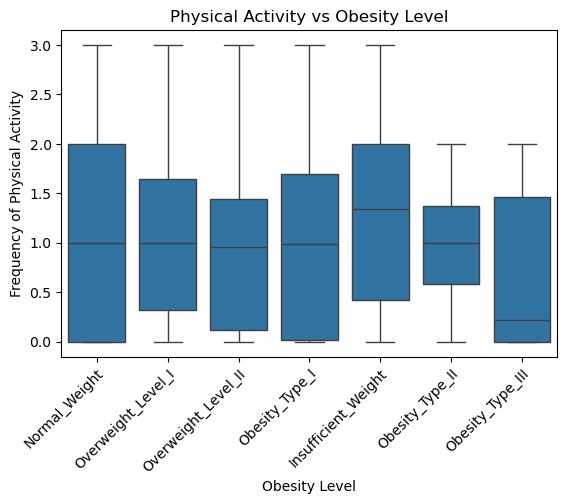

In [20]:
def physical_activity_obesity_correlation(db_name):
    conn = sqlite3.connect(db_name)
    query = """
    SELECT FAF, NObeyesdad
    FROM obesity_data
    """
    data = pd.read_sql_query(query, conn)
    conn.close()
    return data

physical_activity_data = physical_activity_obesity_correlation(database_name)
sns.boxplot(x='NObeyesdad', y='FAF', data=physical_activity_data)
plt.title('Physical Activity vs Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Frequency of Physical Activity')

plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10) 
plt.subplots_adjust(bottom=0.2)  

plt.show()

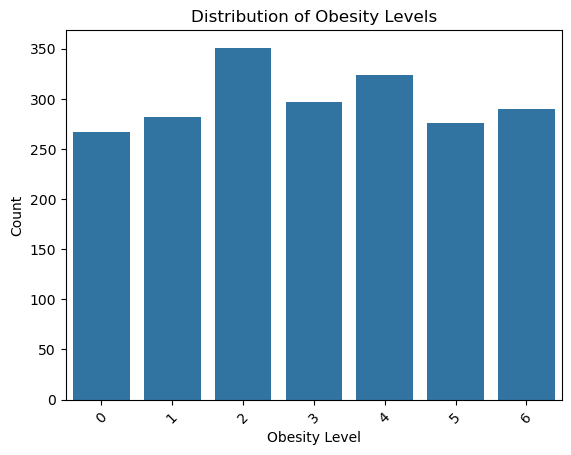

In [21]:
# Target Variable Distribution
sns.countplot(x='NObeyesdad', data=processed_data)
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(processed_data, vars=['Age', 'Height', 'Weight', 'BMI', 'FCVC'], hue='NObeyesdad', palette='Set2')
plt.title('Pairplot of Key Features')
plt.show()

# Distribution of BMI
sns.histplot(processed_data['BMI'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Outliers in BMI by Obesity Level
sns.boxplot(x='NObeyesdad', y='BMI', data=processed_data)
plt.title('Boxplot of BMI by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

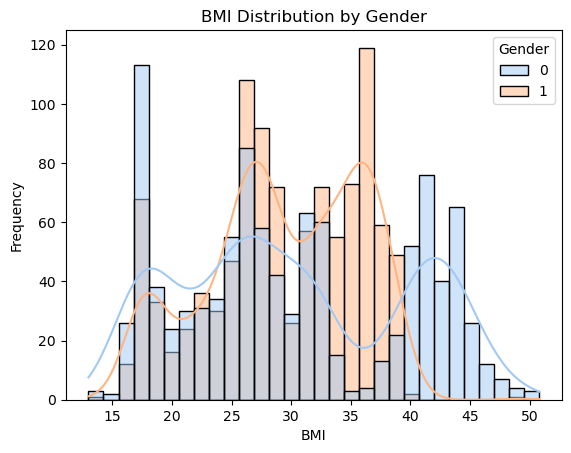

In [23]:
sns.histplot(data=processed_data, x='BMI', hue='Gender', kde=True, bins=30, palette='pastel')
plt.title('BMI Distribution by Gender')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

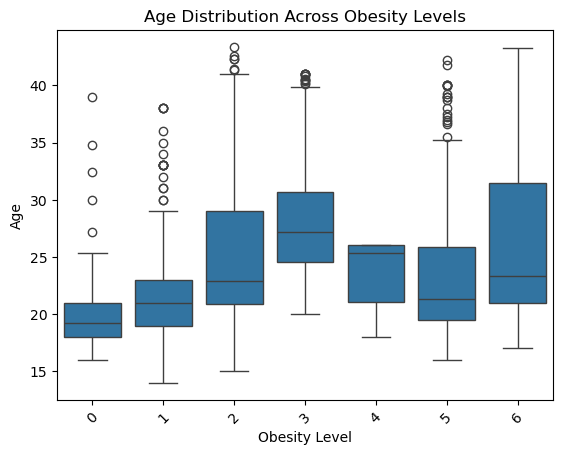

In [24]:
sns.boxplot(x='NObeyesdad', y='Age', data=processed_data)
plt.title('Age Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Step 5: Model Training

y = processed_data['NObeyesdad']
X = processed_data.drop(['NObeyesdad'], axis=1)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, shuffle=True)

In [26]:
# Train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

logreg_preds = logreg.predict(X_test)

print("Logistic Regression Model Training Complete.")

Logistic Regression Model Training Complete.


In [27]:
# Train random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

print("Random Forest Model Training Complete.")

Random Forest Model Training Complete.


In [28]:
# Train K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)  # Use k=5 for simplicity
knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)
print("K-Nearest Neighbors Model Training Complete.")

K-Nearest Neighbors Model Training Complete.


In [29]:
# Step 6: Model Evaluation 

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, logreg_preds))
print(f"Accuracy: {accuracy_score(y_test, logreg_preds):.2f}")

# Evaluate Random Forest
print("Random Forest Performance:")
print(classification_report(y_test, rf_preds))
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.2f}")

# Evaluate K-Nearest Neighbors
print("K-Nearest Neighbors Performance:")
print(classification_report(y_test, knn_preds))
print(f"Accuracy: {accuracy_score(y_test, knn_preds):.2f}")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        74
           1       0.92      0.74      0.82        76
           2       0.95      0.92      0.93        85
           3       0.96      1.00      0.98        82
           4       0.99      1.00      0.99        77
           5       0.77      0.77      0.77        71
           6       0.75      0.82      0.78        57

    accuracy                           0.89       522
   macro avg       0.89      0.89      0.89       522
weighted avg       0.90      0.89      0.89       522

Accuracy: 0.89
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       0.99      0.99      0.99        76
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        77
   

In [30]:
# Step 7: Model Optmization for Random Forest
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],       
    'metric': ['euclidean', 'manhattan'],  
    'weights': ['uniform', 'distance']     
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model after grid search
best_knn = grid_search.best_estimator_

knn_preds = best_knn.predict(X_test)

# Print the classification report
print("Classification Report for K-Nearest Neighbors with Grid Search:")
print(classification_report(y_test, knn_preds))

# Optionally, print the best parameters and best score from grid search
print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best score from GridSearchCV: {grid_search.best_score_}")

Classification Report for K-Nearest Neighbors with Grid Search:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        74
           1       0.80      0.63      0.71        76
           2       0.89      0.95      0.92        85
           3       0.99      1.00      0.99        82
           4       1.00      1.00      1.00        77
           5       0.83      0.82      0.82        71
           6       0.80      0.91      0.85        57

    accuracy                           0.90       522
   macro avg       0.89      0.90      0.89       522
weighted avg       0.90      0.90      0.90       522

Best parameters from GridSearchCV: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best score from GridSearchCV: 0.9009584664536743
